Projekt MNwS - Aleksander Folfas 411052

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats


Zadanie 23

Za pomocą odpowiednich symulacji zbadać odsetek odrzuceń prawdziwej hipotezy głównej (tzn. błąd
I rodzaju) w ANOVA i teście Kruskala-Wallisa w przypadku, gdy generowane dane mają różne
wariancje w grupach. W tym celu można wygenerować trzy próbki danych z rozkładu normalnego:
dwie o tym samym odchyleniu stand., a trzecia o innym odchyleniu stand.
Uzyskane wyniki należy opisać w zależności od:
- liczebności generowanych próbek,
- różnicy (ilorazu) odchyleń standardowych.


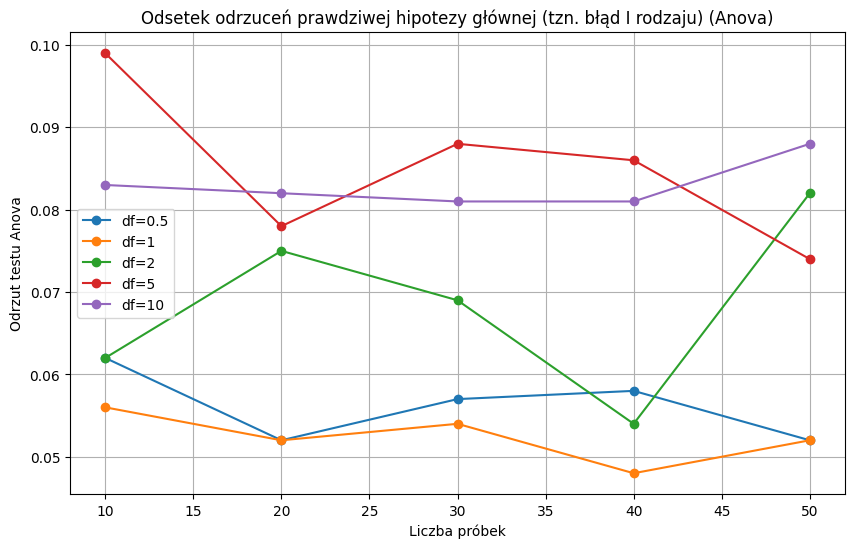

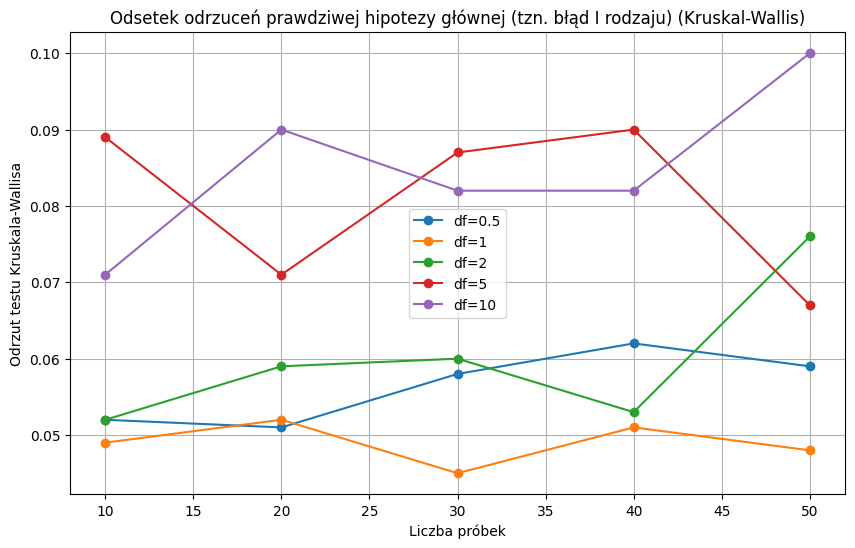

In [4]:
def rejection_rate_anova(n_samples, std_ratio, n_simulations=1000):
    anova_rejections = 0
    kruskal_rejections = 0

    for _ in range(n_simulations):
        # Generowanie trzech próbek danych z rozkładu normalnego
        sample1 = np.random.normal(0, 1, size=n_samples)
        sample2 = np.random.normal(0, 1, size=n_samples)
        sample3 = np.random.normal(0, std_ratio, size=n_samples)

        # Test ANOVA
        _, anova_pvalue = stats.f_oneway(sample1, sample2, sample3)
        if anova_pvalue < 0.05:
            anova_rejections += 1

        # Test Kruskala-Wallisa
        _, kruskal_pvalue = stats.kruskal(sample1, sample2, sample3)
        if kruskal_pvalue < 0.05:
            kruskal_rejections += 1

    anova_rejection_rate = anova_rejections / n_simulations
    kruskal_rejection_rate = kruskal_rejections / n_simulations

    return anova_rejection_rate, kruskal_rejection_rate

# Parametry symulacji
n_samples_range = [10, 20, 30, 40, 50]
std_ratio_range = [0.5, 1, 2, 5, 10]
np.random.seed(411052)

anova_rejection_rates = np.zeros((len(n_samples_range), len(std_ratio_range)))
kruskal_rejection_rates = np.zeros((len(n_samples_range), len(std_ratio_range)))

# Symulacje dla różnych wartości liczebności próbek i różnicy odchyleń standardowych
for i, n_samples in enumerate(n_samples_range):
    for j, std_ratio in enumerate(std_ratio_range):
        anova_rejection_rate, kruskal_rejection_rate = rejection_rate_anova(n_samples, std_ratio)
        anova_rejection_rates[i, j] = anova_rejection_rate
        kruskal_rejection_rates[i, j] = kruskal_rejection_rate

# Wykresy dla testu Anova
plt.figure(figsize=(10, 6))
for j, df in enumerate(std_ratio_range):
    plt.plot(n_samples_range, anova_rejection_rates[:, j], '-o', label=f'df={df}')
plt.xlabel('Liczba próbek')
plt.ylabel('Odrzut testu Anova')
plt.title('Odsetek odrzuceń prawdziwej hipotezy głównej (tzn. błąd I rodzaju) (Anova)')
plt.legend()
plt.grid(True)
plt.show()

#Wykreślenie dla testu Kruskala-Wallisa
plt.figure(figsize=(10, 6))
for j, df in enumerate(std_ratio_range):
    plt.plot(n_samples_range, kruskal_rejection_rates[:, j], '-o', label=f'df={df}')
plt.xlabel('Liczba próbek')
plt.ylabel('Odrzut testu Kruskala-Wallisa')
plt.title('Odsetek odrzuceń prawdziwej hipotezy głównej (tzn. błąd I rodzaju) (Kruskal-Wallis)')
plt.legend()
plt.grid(True)
plt.show()
